In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from scipy.stats import entropy

df = pd.read_csv("../../data/csv/fix_evidence.csv")

def compute_entropy_for_participant(df_participant):
    transitions = []

    # Sort by scene and fixation number
    df_participant = df_participant.sort_values(by=["Scene", "Image", "FixNr"])

    
    prev_aoi = None
    for _, row in df_participant.iterrows():
        current_aoi = row["Name"]
        if prev_aoi is not None and current_aoi != prev_aoi:
            transitions.append((prev_aoi, current_aoi))
        prev_aoi = current_aoi

    # Count transitions and compute probabilities
    transition_counts = Counter(transitions)
    total = sum(transition_counts.values())
    probabilities = [count / total for count in transition_counts.values()]

    # Compute Shannon entropy
    return entropy(probabilities, base=2) if probabilities else 0.0

# Apply to each participant
gaze_entropy_per_participant = (
    df.groupby(["Participant", "experience"])
    .apply(compute_entropy_for_participant)
    .reset_index(name="GazeEntropy")
)


/tmp/ipykernel_418788/818988381.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(compute_entropy_for_participant)


In [2]:
gaze_entropy_per_participant

,Participant,experience,GazeEntropy
0,2.0,Control,8.456672
1,4.0,FirstYear,7.269587
2,7.0,Control,7.893858
3,11.0,ThirdYear,7.563306
4,12.0,FirstYear,7.583379
5,13.0,ThirdYear,7.625353
6,14.0,ThirdYear,7.919890
7,15.0,ThirdYear,7.936260
8,16.0,FirstYear,6.538698
9,18.0,ThirdYear,8.373352


In [3]:
summary_stats = gaze_entropy_per_participant.groupby("experience")["GazeEntropy"].agg(
    AvgEntropy="mean",
    MinEntropy="min",
    MaxEntropy="max"
).reset_index()

In [4]:
summary_stats

,experience,AvgEntropy,MinEntropy,MaxEntropy
0,CSI,7.742173,7.328861,8.069524
1,Control,7.873643,7.509000,8.456672
2,FirstYear,7.640735,6.538698,8.226794
3,ThirdYear,7.894487,7.563306,8.373352


In [5]:
def compute_normalized_entropy_for_participant(df_participant):
    transitions = []

    # Sort by scene and fixation number
    df_participant = df_participant.sort_values(by=["Scene", "FixNr"])

    prev_aoi = None
    for _, row in df_participant.iterrows():
        current_aoi = row["Name"]
        if prev_aoi is not None and current_aoi != prev_aoi:
            transitions.append((prev_aoi, current_aoi))
        prev_aoi = current_aoi

    # Count transitions
    transition_counts = Counter(transitions)
    total = sum(transition_counts.values())
    probs = [count / total for count in transition_counts.values()]

    # Compute entropy
    h = entropy(probs, base=2) if probs else 0.0

    # Normalize by log2(number of unique transitions)
    max_entropy = np.log2(len(transition_counts)) if transition_counts else 1
    return h / max_entropy if max_entropy > 0 else 0.0


In [6]:
# Apply to each participant
gaze_entropy_normalized_per_participant = (
    df.groupby(["Participant", "experience"])
    .apply(compute_normalized_entropy_for_participant)
    .reset_index(name="GazeEntropy")
)

/tmp/ipykernel_418788/2488069404.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(compute_normalized_entropy_for_participant)


In [7]:
gaze_entropy_normalized_per_participant

,Participant,experience,GazeEntropy
0,2.0,Control,0.944445
1,4.0,FirstYear,0.962056
2,7.0,Control,0.951435
3,11.0,ThirdYear,0.948768
4,12.0,FirstYear,0.962528
5,13.0,ThirdYear,0.955998
6,14.0,ThirdYear,0.950918
7,15.0,ThirdYear,0.936551
8,16.0,FirstYear,0.976637
9,18.0,ThirdYear,0.955166


In [8]:
summary_stats = gaze_entropy_normalized_per_participant.groupby("experience")["GazeEntropy"].agg(
    AvgEntropy="mean",
    MinEntropy="min",
    MaxEntropy="max"
).reset_index()

summary_stats

,experience,AvgEntropy,MinEntropy,MaxEntropy
0,CSI,0.952405,0.936394,0.965689
1,Control,0.954047,0.944445,0.964303
2,FirstYear,0.959698,0.937169,0.976637
3,ThirdYear,0.952454,0.934425,0.970446


/tmp/ipykernel_418788/73507130.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gaze_entropy_normalized_per_participant, x="experience", y="GazeEntropy", palette="Set2")


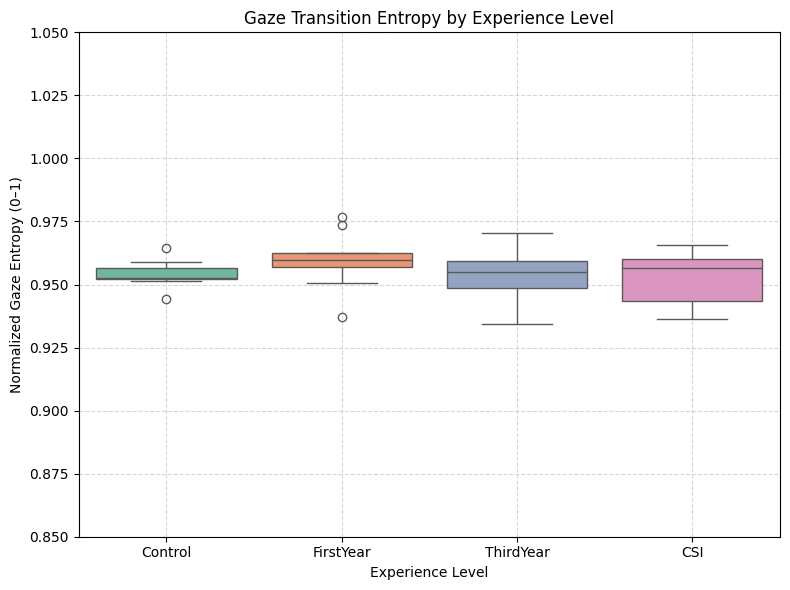

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is called df and it includes 'ExperienceLevel' and 'GazeEntropy' (normalized)
plt.figure(figsize=(8, 6))
sns.boxplot(data=gaze_entropy_normalized_per_participant, x="experience", y="GazeEntropy", palette="Set2")

plt.title("Gaze Transition Entropy by Experience Level")
plt.xlabel("Experience Level")
plt.ylabel("Normalized Gaze Entropy (0–1)")
plt.ylim(0.85, 1.05)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
